In [1]:
import numpy as np
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
from mpl_toolkits import mplot3d as mpl3d
from scipy import signal, stats, linalg, fft

# import our 'specsens' package with the help of 'sys'
import sys
sys.path.insert(0, '..')
import specsens as ss

In [2]:
# mpl.use("pgf")  # to display graphs remove this line
mpl.rcParams.update({
    'pgf.texsystem': 'pdflatex',
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})
line = 0.75

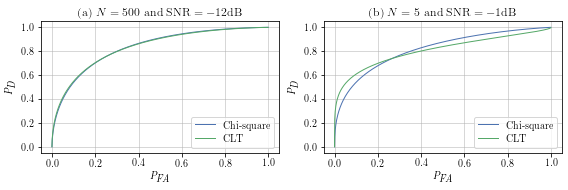

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 2.75))

pfa = np.linspace(0, 0.999, 1000)
pd_chi2 = ss.chi2_stats.roc(noise_power=12,
                            signal_power=0,
                            pfa=pfa,
                            n=500,
                            dB=True)
pd_clt = ss.clt_stats.roc(noise_power=12,
                           signal_power=0,
                           pfa=pfa,
                           n=500,
                           dB=True)

ax1.plot(pfa, pd_chi2, ls='-', label=r'Chi-square', linewidth=1, aa=True)
ax1.plot(pfa, pd_clt, ls='-', label=r'CLT', linewidth=1, aa=True)
ax1.legend(loc=0)
ax1.set_xlabel(r'$P_{\textit{FA}}$')
ax1.set_ylabel(r'$P_{\textit{D}}$')
ax1.set_title(r'(a) $N=500$ and $\textrm{SNR}=-12\textrm{dB}$')
ax1.grid(linewidth=0.5)

pfa = np.linspace(0, 0.999, 1000)
pd_chi2 = ss.chi2_stats.roc(noise_power=1,
                            signal_power=0,
                            pfa=pfa,
                            n=5,
                            dB=True)
pd_clt = ss.clt_stats.roc(noise_power=1,
                           signal_power=0,
                           pfa=pfa,
                           n=5,
                           dB=True)

ax2.plot(pfa, pd_chi2, ls='-', label=r'Chi-square', linewidth=1, aa=True)
ax2.plot(pfa, pd_clt, ls='-', label=r'CLT', linewidth=1, aa=True)
ax2.legend(loc=4)
ax2.set_xlabel(r'$P_{\textit{FA}}$')
ax2.set_ylabel(r'$P_{\textit{D}}$')
ax2.set_title(r'(b) $N=5$ and $\textrm{SNR}=-1\textrm{dB}$')
ax2.grid(linewidth=0.5)

plt.tight_layout()
plt.savefig('out/chap5/narrowband_clt.pdf')